/Users/tinaavbelj/Mag/tourism-recommender-system/venv/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/tinaavbelj/Mag/tourism-recommender-system/venv/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)



Preselection

(3000, 2048)
-
1756
0.5853333333333333
-
-
907
0.5162286203241835
-
-
534
0.5754149702474162
-
-
438
0.6996994233836339
-
-
370
0.6654848396783881
-
-
320
0.6451016185955946
-
-
270
0.6
-
-
222
0.5577390445811499
-
-
184
0.5242165242165242
-
-
155
0.4843942867219185
-
Object selection: knn

Dfmf

Parameters

18 18 8 2


auc: 0.6893175178515493

rmse: 1.0016710711026802


-----



auc: 0.6893175178515493

Preselection

(3000, 2048)
-
1756
0.5853333333333333
-
-
907
0.5162286203241835
-
-
534
0.5754149702474162
-
-
438
0.6996994233836339
-
-
370
0.6654848396783881
-
-
320
0.6451016185955946
-
-
270
0.6
-
-
222
0.5577390445811499
-
-
184
0.5242165242165242
-
-
155
0.4843942867219185
-
Object selection: knn

Dfmf

Parameters

14 10 8 6


auc: 0.6633234028467394

rmse: 1.1602572441622439


-----



auc: 0.6633234028467394

Preselection

(3000, 2048)
-
1756
0.5853333333333333
-
-
907
0.5162286203241835
-
-
534
0.5754149702474162
-
-
438
0.6996994233836339
-
-
370
0.66548483967

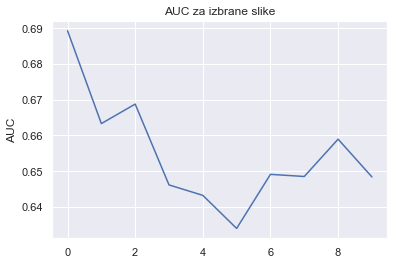

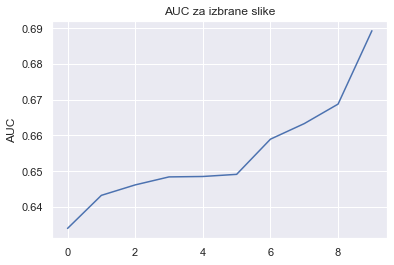

In [1]:
import os
import sys
parent_dir = os.path.split(os.getcwd())[0]
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import random
import pickle

from utils import get_features, save_scores
from object_selection import ObjectSelection
from load_data import load_data
import matplotlib.pyplot as plt

# Parameters
data_directory = '../../data/generated-data-nr-2-n-6-4/'
features_path = '../../data/features-generated-data-nr-2-n-6-4'
booking_file = '../../data/booking.csv'
users_file = '../../data/user.csv'
rating_thresholds = []
true_objects_indexes = [0, 1, 2, 3, 4, 5]
false_objects_indexes = [6, 7, 8, 9]

file_names = os.listdir(data_directory)
img_ids_vector = [int(name.split('-')[0]) for name in file_names]
ratings_vector = [int(name.split('-')[-2]) for name in file_names]
name_vector = [data_directory + name for name in file_names]
images_indexes = [name.split('-')[3].split('.')[0] for name in file_names]

ratings_matrix, images_indexes_for_id, ids_indexes, users_matrix = load_data(data_directory, booking_file,
                                                                             users_file, rating_thresholds, binary=True)

features = get_features(features_path, name_vector)

# K Nearest Neighbors
cv_results_file = '../results/cv-generated-data-nr-2-n-6-4-knn.csv'
scores = []
for _ in range(10):
    selection = ObjectSelection(show_selection_results=False, selection_algorithm='knn')
    #selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix, users=users_matrix, cv_results_file=cv_results_file)
    selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                    users=users_matrix, cv_results_file=cv_results_file, images_indexes=images_indexes,
                    true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                    paths=name_vector)
    selection.evaluate(evaluation_metric='auc')
    selection.evaluate(evaluation_metric='rmse')
    print('\n\n-----\n\n')
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

scores.sort()
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

results_file = '../scores/generated-data-nr-2-n-6-4-knn.csv'
save_scores(scores, results_file)

Object selection: random

Dfmf

Parameters

16 18 6 2


rmse: 1.063124471921691


-----



auc: 0.6714101057579318
Object selection: random

Dfmf

Parameters

14 10 6 6


rmse: 1.2716346719356602


-----



auc: 0.6226864589683181
Object selection: random

Dfmf

Parameters

14 10 6 6


rmse: 1.2529827553429078


-----



auc: 0.6193747762718433
Object selection: random

Dfmf

Parameters

14 10 6 6


rmse: 1.2809761299858442


-----



auc: 0.6061530738950094
Object selection: random

Dfmf

Parameters

14 10 6 6


rmse: 1.2700853044139901


-----



auc: 0.6522537784584775
Object selection: random

Dfmf

Parameters

14 10 6 6


rmse: 1.2833481778858067


-----



auc: 0.6268491539645729
Object selection: random

Dfmf

Parameters

14 10 6 6


rmse: 1.2752465090215386


-----



auc: 0.6383633018221718
Object selection: random

Dfmf

Parameters

14 10 6 6


rmse: 1.2700784419387057


-----



auc: 0.6353408111005827
Object selection: random

Dfmf

Parameters

14 10 6 6


rmse: 1.262225807

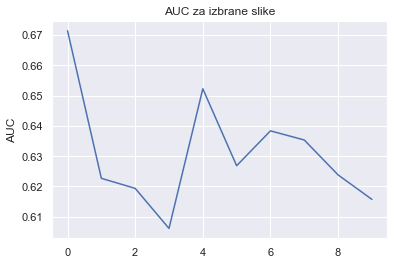

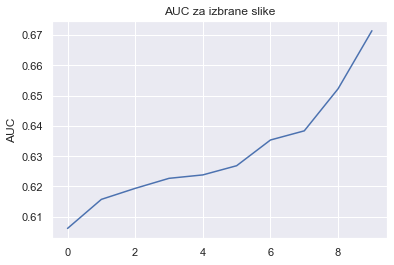

In [2]:
# Random selection
cv_results_file = '../results/cv-generated-data-nr-2-n-6-4-random.csv'
scores = []
for _ in range(10):
    selection = ObjectSelection(show_selection_results=False, selection_algorithm='random')
    selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                    users=users_matrix, cv_results_file=cv_results_file, images_indexes=images_indexes,
                    true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                    paths=name_vector) 
    selection.evaluate(evaluation_metric='rmse')
    print('\n\n-----\n\n')
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

scores.sort()
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

results_file = '../scores/generated-data-nr-2-n-6-4-random.csv'
save_scores(scores, results_file)


Preselection

(3000, 2048)
-
1794
0.598
-
-
909
0.5061268967416895
-
-
583
0.6221874061330931
-
-
520
0.7503607503607505
-
-
499
0.7607557287084749
-
-
468
0.7441710336447178
-
-
456
0.7550202781472177
-
-
443
0.754814233385662
-
Object selection: rf

Dfmf

Parameters

12 12 8 8


rmse: 1.2199683160439412


-----



auc: 0.6310458945148301

Preselection

(3000, 2048)
-
1813
0.6043333333333333
-
-
914
0.5035812672176309
-
-
601
0.6427776403660648
-
-
525
0.7458022670788629
-
-
489
0.7535202252944188
-
-
459
0.735576923076923
-
-
453
0.7575628140703518
-
-
435
0.7435897435897436
-
-
419
0.7365079365079366
-
-
408
0.7378672150411281
-
Object selection: rf

Dfmf

Parameters

12 12 8 8


rmse: 1.2123366715269457


-----



auc: 0.6518749492488835

Preselection

(3000, 2048)
-
1833
0.6109999999999999
-
-
985
0.5362027174473197
-
-
649
0.6445214404169628
-
-
600
0.7854253512428594
-
-
579
0.7921642042771367
-
-
542
0.7687943262411348
-
-
515
0.7619337921992789
-
-
503
0.7715582237630181
-
-


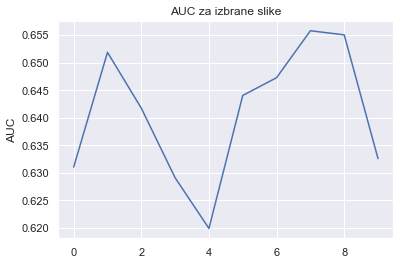

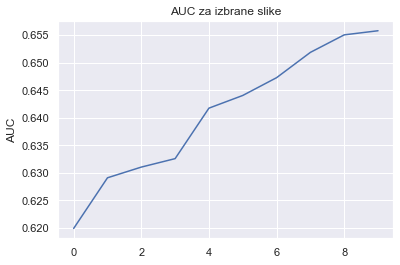

In [3]:


# Random forest
cv_results_file = '../results/cv-generated-data-r-2-n-6-4-random.csv'
scores = []
for _ in range(10):
    selection = ObjectSelection(show_selection_results=False, selection_algorithm='rf')
    selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                    users=users_matrix, cv_results_file=cv_results_file, images_indexes=images_indexes,
                    true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                    paths=name_vector) 
    selection.evaluate(evaluation_metric='rmse')
    print('\n\n-----\n\n')
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

scores.sort()
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

results_file = '../scores/generated-data-nr-2-n-6-4-rf.csv'
save_scores(scores, results_file)

In [4]:
from basic_factorization import BasicFactorization


cv_results_file = '../results/cv-generated-data-nr-2-n-6-4-knn.csv'
scores = []
for _ in range(10):
    selection = BasicFactorization(show_selection_results=True, selection_algorithm='random')
    selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                        users=users_matrix, cv_results_file=cv_results_file, images_indexes=images_indexes,
                        true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                        paths=name_vector)
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
results_file = '../scores/generated-data-nr-2-n-6-4-b.csv'
save_scores(scores, results_file)

Object selection: random

Dfmf

auc: 0.675910211662237
Object selection: random

Dfmf

auc: 0.6697624674463911
Object selection: random

Dfmf

auc: 0.6618764683793744
Object selection: random

Dfmf

auc: 0.6588105069194363
Object selection: random

Dfmf

auc: 0.6404935647771273
Object selection: random

Dfmf

auc: 0.6507172463851164
Object selection: random

Dfmf

auc: 0.6700508925572863
Object selection: random

Dfmf

auc: 0.6677072873977504
Object selection: random

Dfmf

auc: 0.6724071614549088
Object selection: random

Dfmf

auc: 0.6614460240403054
